In [9]:
import Pkg; Pkg.add("Distributions")

In [10]:
using SpecialFunctions
using PyPlot
using LinearAlgebra
using Random, Distributions
using KernelDensity
using LaTeXStrings
using JLD
using StatsBase
using Dates

In [16]:
γ = 0.5772156649015328606065121; # Euler-Mascheroni constant
Ein(z) = (z == 0) ? 0 : γ + log(abs(z)) - expinti(-z);
k(x,y,σ) = - σ^2 * Ein(-x⋅y / σ^2);

In [17]:
dist = Uniform(-1,1);

In [18]:
dimensions = [1 3 6 10]
sigmas = [0.02 0.05 0.1 0.2 0.5 1]
EkXX_lookup = zeros(length(dimensions), length(sigmas))
EkX1X2_lookup = zeros(length(dimensions), length(sigmas))

N = 1000000

for (i,d) in enumerate(dimensions)
    for (j, σ) in enumerate(sigmas)
        EkXX = 0
        for i = 1:N
            x = rand(dist, d)
            EkXX += k(x,x,σ)
        end
        EkXX /= N
        EkXX_lookup[i,j] = EkXX
        
        EkX1X2 = 0
        for i = 1:N
            x1 = rand(dist, d)
            x2 = rand(dist, d)
            EkX1X2 += k(x1,x2,σ)
        end
        EkX1X2 /= N
        EkX1X2_lookup[i,j] = EkX1X2
    end
end

In [23]:
function ub(n,i,j,σ,d)
    return 2*exp(d/(6*σ^2))*sqrt((EkXX_lookup[i,j] - EkX1X2_lookup[i,j])/n)
end

ub (generic function with 3 methods)

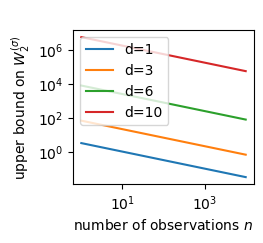

PyObject <matplotlib.legend.Legend object at 0x0000000000FB60B8>

In [40]:
fig = figure(figsize=(3.5/3*2, 3/3*2))
sample_sizes = 1:10000
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
for i = 1:length(dimensions)
    d = dimensions[i]
    for j = 5
        σ = sigmas[j]
        plot(sample_sizes, [ub(n,i,j,σ,d) for n in sample_sizes], color=colors[i], linestyle="-", label="d=$(d)")
    end

end
xlabel(L"number of observations $n$")
xscale("log")
yscale("log")
ylabel(L"upper bound on $W_2^{(\sigma)}$")
legend()